Biomechanical Features of Orthopedic Patients PRoject 

Loading The Data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



Make a pandas DataFrame from the CSV

In [ ]:
df=pd.read_csv("/content/ortho_knnnb.csv")

In [ ]:
print("This Dataset has" ,df.shape[0],"Rows")
print("This Dataset has" ,df.shape[1],"Columns")

This Dataset has 310 Rows
This Dataset has 7 Columns


In [ ]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


This Data is Record of Multiple Instances of orthopedic Parameters and we have the Classification as Normal And Abnormal

on the Basis of Orthopdic Parameters we will predict the A patient is Normal or Have Paget's Disease 

# EDA

In [ ]:
df.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [ ]:
df['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

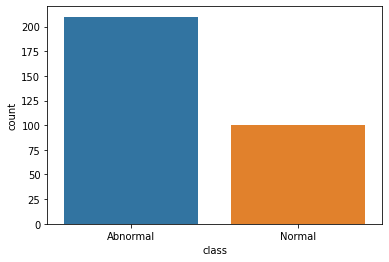

In [ ]:
sns.countplot(x='class',data=df)

In [ ]:
corr=df.corr()
corr

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


Outlier Analysis

Outlier Analysis: 


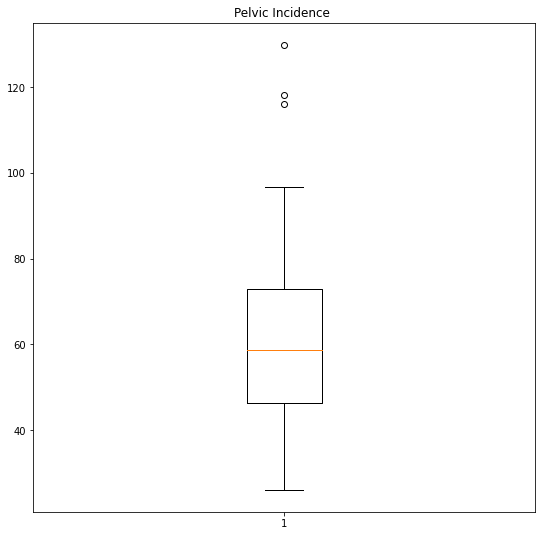

In [ ]:
print("Outlier Analysis: ")
plt.figure(figsize=(9,9))
plt.boxplot(df['pelvic_incidence'])
plt.title("Pelvic Incidence ")
plt.show()

Outlier Analysis: 


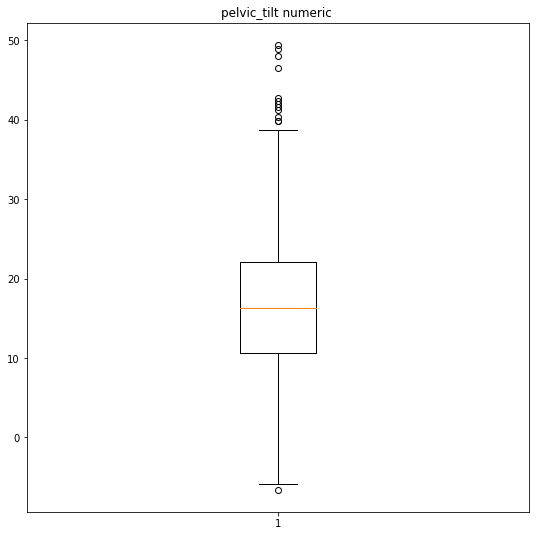

In [ ]:
print("Outlier Analysis: ")
plt.figure(figsize=(9,9))
plt.boxplot(df['pelvic_tilt numeric'])
plt.title("pelvic_tilt numeric ")
plt.show()

Outlier Analysis: 


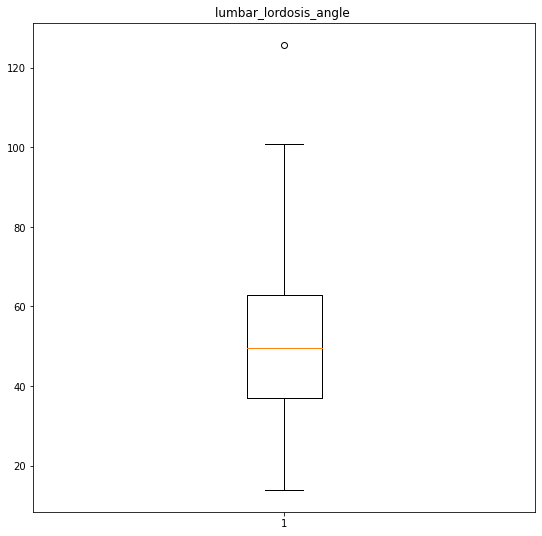

In [ ]:
print("Outlier Analysis: ")
plt.figure(figsize=(9,9))
plt.boxplot(df['lumbar_lordosis_angle'])
plt.title("lumbar_lordosis_angle ")
plt.show()

Outlier Analysis: 


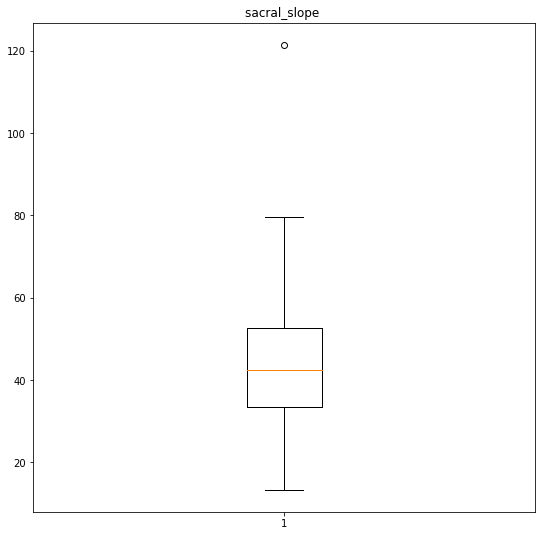

In [ ]:
print("Outlier Analysis: ")
plt.figure(figsize=(9,9))
plt.boxplot(df['sacral_slope'])
plt.title("sacral_slope ")
plt.show()

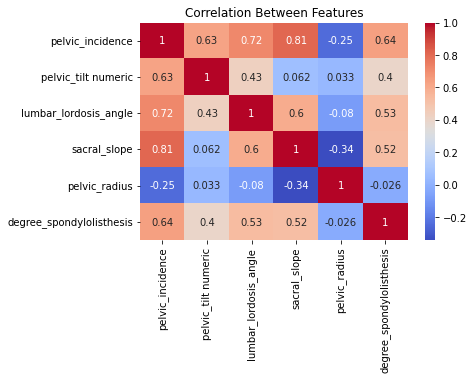

In [ ]:
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()

Preparing Dataframe to be Trained

In [ ]:
data_class=df['class'].replace({'Abnormal':0,'Normal':1})
X=df.drop(["class"],axis=1)
y=data_class.values

Training The KNN Model and Predicting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)
from sklearn.neighbors import KNeighborsClassifier 

  

In [ ]:
print("Dimension of Train X",X_train.shape)
print("Dimension of Train Y",y_train.shape)
print("Dimension of Test X",X_test.shape)
print("Dimension of Test y",y_test.shape)

Dimension of Train X (217, 6)
Dimension of Train Y (217,)
Dimension of Test X (93, 6)
Dimension of Test y (93,)


In [ ]:
train_accuracy=[]
test_accuracy=[]
for k in range(3, 10):

  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  train_pred=knn.predict(X_train)
  train_score=accuracy_score(train_pred,y_train)
  test_pred= knn.predict(X_test)
  test_score=(round(accuracy_score(test_pred,y_test)*100,2))
  
  test_accuracy.append(test_score)

 
  print("Test Accuracy: ",test_score,"Value of K: ",k)
#print("Best Accuracy is {}% with K={}".format(max(test_accuracy),1+test_accuracy.index(max(test_accuracy))))


Test Accuracy:  86.02 Value of K:  3
Test Accuracy:  84.95 Value of K:  4
Test Accuracy:  83.87 Value of K:  5
Test Accuracy:  83.87 Value of K:  6
Test Accuracy:  84.95 Value of K:  7
Test Accuracy:  82.8 Value of K:  8
Test Accuracy:  87.1 Value of K:  9


In [ ]:
print("Best Accuracy is {}% with Value of K={}".format(max(test_accuracy),3+test_accuracy.index(max(test_accuracy))))

Best Accuracy is 87.1% with Value of K=9


# Training with Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nvclassifier=GaussianNB()
nvclassifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [53]:
#predicting the Test Set Results
y_pred=nvclassifier.predict(X_test)
print(y_pred)


[0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0
 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1]


In [61]:
test=X_test.reset_index(drop=True)
test["PRED_class"]=y_pred
test.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,PRED_class
0,64.809541,15.174078,58.839994,49.635463,111.679961,21.407198,0,0
1,69.563486,15.401139,74.438497,54.162347,105.067356,29.701211,0,0
2,47.744679,12.089351,39.000000,35.655328,117.512004,21.682401,0,0
3,71.001941,37.515772,84.537093,33.486169,125.164232,67.771190,0,0
4,70.676898,21.704402,59.181161,48.972496,103.008355,27.810148,0,0


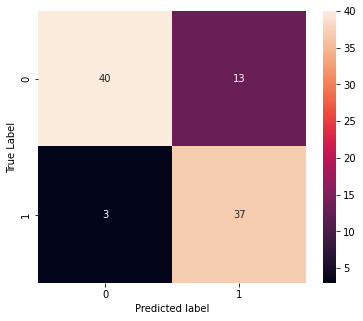

In [62]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm,annot=True)
plt.ylabel("True Label")
plt.xlabel("Predicted label")
plt.show()

In [63]:
from sklearn.metrics import accuracy_score
print("The Accuracy of the NB is {}%".format(round(accuracy_score(y_pred,y_test)*100,2)))


The Accuracy of the NB is 82.8%
